In [1]:
# %load_ext autoreload
# %autoreload 2

# Train simple baseline models on limited, single season data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.features.data_engineering import preprocess_single_season, reverse_processing

##### Train on 2020-21 season data

In [2]:
(x_train_2021, y_train_2021), (x_test_2021, y_test_2021), (x_train_2021_target, x_test_2021_target), x_2021_scaler = preprocess_single_season('2020-21')

# (x_train_1617, y_train_1617), (x_test_1617, y_test_1617), (x_train_1617_target, x_test_1617_target), x_1617_scaler = preprocess_single_season('2016-17')

## Train on baseline Dummy model

In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [5]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train_2021, y_train_2021)

DummyRegressor()

In [6]:
y_pred_2021 = dummy_regr.predict(x_test_2021)

In [7]:
mean_squared_error(y_pred_2021, y_test_2021)

6.18489872538868

## Train on baseline decision tree model

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
tree_regr = DecisionTreeRegressor()
tree_regr.fit(x_train_2021, y_train_2021)

DecisionTreeRegressor()

In [10]:
y_pred_2021 = tree_regr.predict(x_test_2021)

In [11]:
mean_squared_error(y_pred_2021, y_test_2021)

8.996104417670683

Feature 0: xP, Score: 0.06957
Feature 1: assists, Score: 0.00282
Feature 2: bonus, Score: 0.00151
Feature 3: bps, Score: 0.03994
Feature 4: clean_sheets, Score: 0.00193
Feature 5: creativity, Score: 0.05696
Feature 6: goals_conceded, Score: 0.01299
Feature 7: goals_scored, Score: 0.00035
Feature 8: ict_index, Score: 0.04169
Feature 9: influence, Score: 0.05033
Feature 10: minutes, Score: 0.25232
Feature 11: own_goals, Score: 1e-05
Feature 12: penalties_missed, Score: 0.00233
Feature 13: penalties_saved, Score: 0.0
Feature 14: red_cards, Score: 0.0
Feature 15: saves, Score: 0.00348
Feature 16: selected, Score: 0.11608
Feature 17: threat, Score: 0.02745
Feature 18: total_points, Score: 0.01221
Feature 19: transfers_balance, Score: 0.06892
Feature 20: transfers_in, Score: 0.07205
Feature 21: transfers_out, Score: 0.07738
Feature 22: value, Score: 0.06386
Feature 23: was_home, Score: 0.00865
Feature 24: yellow_cards, Score: 0.00264
Feature 25: position_DEF, Score: 0.00564
Feature 26: posit

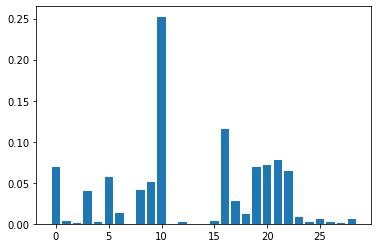

In [12]:
# summarize feature importance
importance = tree_regr.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature {i}: {x_train_2021.columns[i]}, Score: {round(v,5)}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Train on baseline SVR model

In [13]:
from sklearn.svm import LinearSVR

In [14]:
model_svr = LinearSVR()
model_svr.fit(x_train_2021, y_train_2021)

d:\studies\informatyka\semestr_3\fpl_ai_manager\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [15]:
# create series to keep indexes and name same as in the original y data
y_pred_2021 = pd.Series(model_svr.predict(x_test_2021), index=y_test_2021.index, name='predicted_total_points_next_gameweek')

In [16]:
mean_squared_error(y_pred_2021, y_test_2021)

5.212035505530282

## Merge results with footballers extracted target data

In [17]:
x_test_reversed = reverse_processing(x_test_2021, x_2021_scaler, x_test_2021_target)

In [18]:
predictions_svr_2021 = pd.concat([y_pred_2021, x_test_reversed], axis=1)

In [19]:
#preview x_test_reversed sorted by predicted total points descending
predictions_svr_2021.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,xP,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
18785,4.158296,Sam Johnstone,31,417,2.0,9.5,0.0,3.0,45.0,1.0,...,937.0,16469.0,15532.0,45.0,1.0,0.0,0.0,0.0,1.0,0.0
451,4.119587,Alisson Ramses Becker,2,252,2.0,8.0,0.0,2.0,41.0,1.0,...,-92351.0,10612.0,102963.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0
21725,4.062341,Edouard Mendy,35,548,0.0,0.0,0.0,3.0,36.0,0.0,...,6142.0,34232.0,28090.0,52.0,0.0,0.0,0.0,0.0,1.0,0.0
22536,3.991650,Scott Carson,36,608,0.0,3.3,0.0,1.0,27.0,0.0,...,-55.0,1047.0,1102.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0
19585,3.101593,Kelechi Iheanacho,32,233,12.0,8.0,0.0,0.0,30.0,1.0,...,712878.0,720792.0,7914.0,60.0,1.0,0.0,0.0,1.0,0.0,0.0
5359,3.097279,Diogo Jota,10,468,1.0,7.7,0.0,2.0,23.0,0.0,...,783351.0,803730.0,20379.0,67.0,0.0,0.0,0.0,0.0,0.0,1.0
1202,3.060454,James RodrÃ­guez,3,508,18.0,5.7,0.0,0.0,16.0,0.0,...,682098.0,806071.0,123973.0,76.0,0.0,0.0,0.0,0.0,0.0,1.0
12160,3.047102,Ilkay GÃ¼ndogan,21,271,8.0,8.8,0.0,0.0,17.0,1.0,...,674097.0,687138.0,13041.0,58.0,1.0,0.0,0.0,0.0,0.0,1.0
15938,3.002705,Dominic Calvert-Lewin,26,164,2.0,9.7,0.0,0.0,0.0,1.0,...,765433.0,811559.0,46126.0,78.0,1.0,0.0,0.0,1.0,0.0,0.0
5047,2.993536,Hakim Ziyech,9,114,2.0,9.8,0.0,0.0,10.0,1.0,...,745737.0,764461.0,18724.0,82.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train on baseline Multi-layer Perceptron model

In [20]:
import tensorflow as tf

In [21]:
model_mlp = tf.keras.models.Sequential()

model_mlp.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(x_train_2021.shape[1],)))
model_mlp.add(tf.keras.layers.Dense(units=16, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [22]:
model_mlp.compile(optimizer='adam',
                  loss='mse')

In [23]:
history = model_mlp.fit(x_train_2021, y_train_2021,
                        batch_size=4,
                        epochs=30,
                        validation_split=0.2)

Epoch 1/30
3784/3784 [==============================] - 4s 826us/step - loss: 4.6766 - val_loss: 4.0122
Epoch 2/30
3784/3784 [==============================] - 3s 802us/step - loss: 4.4863 - val_loss: 4.0433
Epoch 3/30
3784/3784 [==============================] - 3s 724us/step - loss: 4.4536 - val_loss: 4.0086
Epoch 4/30
3784/3784 [==============================] - 3s 750us/step - loss: 4.4319 - val_loss: 4.1535
Epoch 5/30
3784/3784 [==============================] - 3s 806us/step - loss: 4.4264 - val_loss: 3.9911
Epoch 6/30
3784/3784 [==============================] - 3s 749us/step - loss: 4.4079 - val_loss: 4.0165
Epoch 7/30
3784/3784 [==============================] - 3s 753us/step - loss: 4.4015 - val_loss: 4.0100
Epoch 8/30
3784/3784 [==============================] - 3s 758us/step - loss: 4.3954 - val_loss: 4.0259
Epoch 9/30
3784/3784 [==============================] - 3s 773us/step - loss: 4.3786 - val_loss: 4.0087
Epoch 10/30
3784/3784 [==============================] - 3s 780u

In [24]:
score = model_mlp.evaluate(x_test_2021, y_test_2021, verbose=0)
print('Test loss:', score)

Test loss: 4.695950508117676


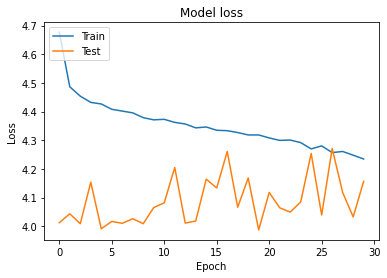

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

MLP model is achieving the lowest loss value from all baseline models.

In [26]:
y_pred_2021_mlp = pd.Series(model_mlp.predict(x_test_2021).reshape(-1,), index=y_test_2021.index, name='predicted_total_points_next_gameweek')

In [27]:
predictions_mlp_2021 = pd.concat([y_pred_2021_mlp, x_test_reversed], axis=1)
#preview x_test_reversed sorted by predicted total points descending
predictions_mlp_2021.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,xP,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
10194,12.284394,Kevin De Bruyne,19,272,0.0,14.0,0.0,0.0,10.0,0.0,...,395204.0,436458.0,41254.0,118.0,1.0,0.0,0.0,0.0,0.0,1.0
21725,11.413375,Edouard Mendy,35,548,0.0,0.0,0.0,3.0,36.0,0.0,...,6142.0,34232.0,28090.0,52.0,0.0,0.0,0.0,0.0,1.0,0.0
451,11.215323,Alisson Ramses Becker,2,252,2.0,8.0,0.0,2.0,41.0,1.0,...,-92351.0,10612.0,102963.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0
14258,10.054555,Ilkay GÃ¼ndogan,24,271,3.0,20.7,0.0,0.0,0.0,0.0,...,788107.0,806253.0,18146.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0
22536,9.510241,Scott Carson,36,608,0.0,3.3,0.0,1.0,27.0,0.0,...,-55.0,1047.0,1102.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0
7672,8.918027,Heung-Min Son,14,390,3.0,6.4,0.0,0.0,3.0,0.0,...,154155.0,170409.0,16254.0,97.0,1.0,0.0,0.0,0.0,0.0,1.0
15004,8.565766,Patrick Bamford,25,202,6.0,12.0,0.0,0.0,5.0,0.0,...,520289.0,552561.0,32272.0,69.0,0.0,0.0,0.0,1.0,0.0,0.0
11000,7.676172,Aaron Cresswell,19,435,5.0,13.4,0.0,0.0,14.0,0.0,...,286229.0,317337.0,31108.0,54.0,1.0,0.0,1.0,0.0,0.0,0.0
14612,7.380221,Sadio ManÃ©,25,251,3.0,3.3,0.0,0.0,-4.0,0.0,...,-5872.0,15325.0,21197.0,118.0,1.0,1.0,0.0,0.0,0.0,1.0
17323,7.303397,Harry Kane,28,388,7.0,4.7,0.0,0.0,6.0,0.0,...,437315.0,488213.0,50898.0,114.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train on baseline XGBoost model

In [7]:
import xgboost as xgb

In [8]:
model_xgb = xgb.XGBRegressor()

In [9]:
model_xgb.fit(x_train_2021, y_train_2021)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [10]:
# create series to keep indexes and name same as in the original y data
y_pred_2021 = pd.Series(model_xgb.predict(x_test_2021), index=y_test_2021.index,
                        name='predicted_total_points_next_gameweek')

In [11]:
mean_squared_error(y_pred_2021, y_test_2021)

4.788602886673564

Feature 0: xP, Score: 0.021770000457763672
Feature 1: assists, Score: 0.009379999712109566
Feature 2: bonus, Score: 0.014089999720454216
Feature 3: bps, Score: 0.019139999523758888
Feature 4: clean_sheets, Score: 0.01295000035315752
Feature 5: creativity, Score: 0.021700000390410423
Feature 6: goals_conceded, Score: 0.016510000452399254
Feature 7: goals_scored, Score: 0.028359999880194664
Feature 8: ict_index, Score: 0.08748999983072281
Feature 9: influence, Score: 0.03085000067949295
Feature 10: minutes, Score: 0.30461999773979187
Feature 11: own_goals, Score: 0.012109999544918537
Feature 12: penalties_missed, Score: 0.02126999944448471
Feature 13: penalties_saved, Score: 0.016009999439120293
Feature 14: red_cards, Score: 0.02201000042259693
Feature 15: saves, Score: 0.02355000004172325
Feature 16: selected, Score: 0.030899999663233757
Feature 17: threat, Score: 0.02274000085890293
Feature 18: total_points, Score: 0.03125999867916107
Feature 19: transfers_balance, Score: 0.02312999963

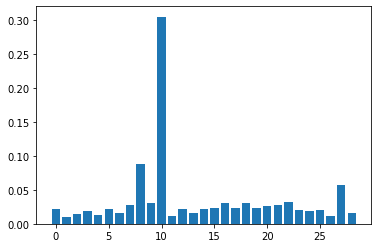

In [12]:
# summarize feature importance
importance = model_xgb.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature {i}: {x_train_2021.columns[i]}, Score: {round(v,5)}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()